In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import sklearn.linear_model
import sklearn
import sklearn.ensemble
import sklearn.tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
N = 150000
from sklearn import linear_model

# Loading Data

In [2]:
#data = pd.read_csv('../input/train.tsv',delimiter='\t',encoding='utf-8')
data = pd.read_csv('train.csv',delimiter='\t',encoding='utf-8')
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


# Cleaning Data
###  Finding Features of our Data 

In [3]:
may_be_names = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

# removing all features (may be) containing names
a = []
for i in range(len(data.Phrase)-N):
    line = data.Phrase[i].split(' ')
    line_without_names = [word.lower() for word in line if word != '' and word[0] not in may_be_names]
    a += list(set(line_without_names))
    a = list(set(a))

In [4]:
# adding stop words
a.sort()
stop_words = set(stopwords.words('english'))
new_stop_words = (list(stop_words)  + a[:121])
new_stop_words.sort()

In [5]:
# extract features (excluding stop words)
features_of_model = [word for word in a if word not in new_stop_words]
print('features in our model :-',len(features_of_model))

features in our model :- 1292


### Creating data frame

In [6]:
#Creating data frame with null values
X = pd.DataFrame(data = np.zeros((len(data)-N,len(features_of_model) + 1),dtype=int),columns = features_of_model+['SENTIMENT'])
X.head()

,base,baseball,bathtub,battle,beaten,beautiful,becomes,begging,believe,beneath,...,wrong,yarn,year,years,yes,yet,young,youth,zingers,SENTIMENT
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# entring values in data frame
for i in range(len(data) - N):
    current_row = data.Phrase[i].split()
    for word in current_row:
        if len(current_row) > 0:
            word = word.lower()
            X['SENTIMENT'][i] = data.Sentiment[i]
            if word in features_of_model:
                X[word][i] +=1

### Shuffling data to run on models

In [8]:
# shuffling data for training and testing
X_train,X_test,Y_train,Y_test = sklearn.model_selection.train_test_split(X.drop(['SENTIMENT'],axis = 1),X['SENTIMENT'],test_size = 0.3)


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6060 entries, 0 to 6059
Columns: 1293 entries, base to SENTIMENT
dtypes: int32(1293)
memory usage: 29.9 MB


# Using differenent classifiers to find the accuracy of our data

In [10]:
# to create list of model scores
name = []
test_score = []
train_score = []

In [11]:
#linear = linear_model.LinearRegression()
#linear.fit(X_train, Y_train)
#train_score +=[linear.score(X_train, Y_train)]


In [12]:
#predicted=linear.predict(X_test)
#predicted

### Using Decision Tree Classifier

In [13]:
decision_tree = sklearn.tree.DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
name += ['decision tree']
train_score += [decision_tree.score(X_train,Y_train)]
test_score += [decision_tree.score(X_test,Y_test)]

In [14]:
dec_test_score = []
dec_train_score = []
for depth in range(1,20):
    decision_tree = sklearn.tree.DecisionTreeClassifier(max_depth=depth)
    decision_tree.fit(X_train,Y_train)
    dec_train_score += [decision_tree.score(X_train,Y_train)]
    dec_test_score+= [decision_tree.score(X_test,Y_test)]

### Plotting LINE PLOT to see the relationship of score with depth of tree 

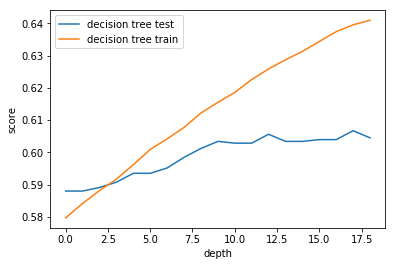

In [15]:
plt.plot(dec_test_score,label = 'decision tree test')
plt.plot(dec_train_score,label = 'decision tree train')
plt.xlabel('depth')
plt.ylabel('score')
plt.legend()
plt.show()

### Using Random Forest

In [16]:
random_forest = sklearn.ensemble.RandomForestClassifier()
random_forest.fit(X_train,Y_train)
name += ['random_forest']
train_score += [random_forest.score(X_train,Y_train)]
test_score += [random_forest.score(X_test,Y_test)]

### Using Support Vector Machine

In [17]:
support_vector_machine = SVC()
support_vector_machine.fit(X_train,Y_train)
name += ['support vector machine']
train_score += [support_vector_machine.score(X_train,Y_train)]
test_score += [support_vector_machine.score(X_test,Y_test)]

### Using Logistic Regression

In [18]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,Y_train)
name += ['logistic regression']
train_score += [logistic_regression.score(X_train,Y_train)]
test_score += [logistic_regression.score(X_test,Y_test)]

### Using K-Nearest Neighbour

In [19]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)
name += ['k-nearest neighbour , here k = 3']
train_score += [neigh.score(X_train,Y_train)]
test_score += [neigh.score(X_test,Y_test)]

neigh1 = KNeighborsClassifier(n_neighbors=10)
neigh1.fit(X_train, Y_train)
name += ['k-nearest neighbour , here k = 10']
train_score += [neigh1.score(X_train,Y_train)]
test_score += [neigh1.score(X_test,Y_test)]

##Using Gaussian Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, Y_train)
train_score +=[model.score(X_train,Y_train)]
name += ['Gaussian Naive Bayes']
test_score += [model.score(X_test,Y_test)]

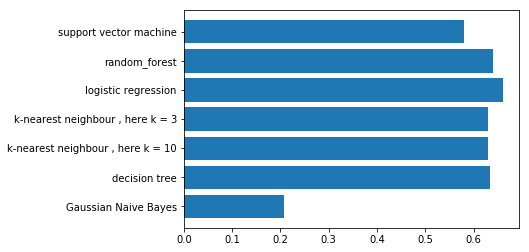

In [28]:
plt.barh(name,test_score)
plt.show()

In [29]:
test_score

[0.6336633663366337,
 0.6397139713971397,
 0.5808580858085809,
 0.6600660066006601,
 0.6303630363036303,
 0.6303630363036303,
 0.20737073707370737]

In [23]:
train_score

[0.8847241867043847,
 0.8745874587458746,
 0.5730787364450731,
 0.7454031117397454,
 0.7814710042432814,
 0.6603017444601603]

In [24]:
Sentiment_words=[]
for row in data['Sentiment']:
    if row ==0:
        Sentiment_words.append('negative')
    elif row == 1:
        Sentiment_words.append('somewhat negative')
    elif row == 2:
        Sentiment_words.append('neutral')
    elif row == 3:
        Sentiment_words.append('somewhat positive')
    elif row == 4:
        Sentiment_words.append('positive')
    else:
        Sentiment_words.append('Failed')
data['Sentiment_words'] = Sentiment_words

In [25]:
word_count=pd.value_counts(data['Sentiment_words'].values, sort=False)
word_count

somewhat positive    32927
somewhat negative    27273
positive              9206
neutral              79582
negative              7072
dtype: int64

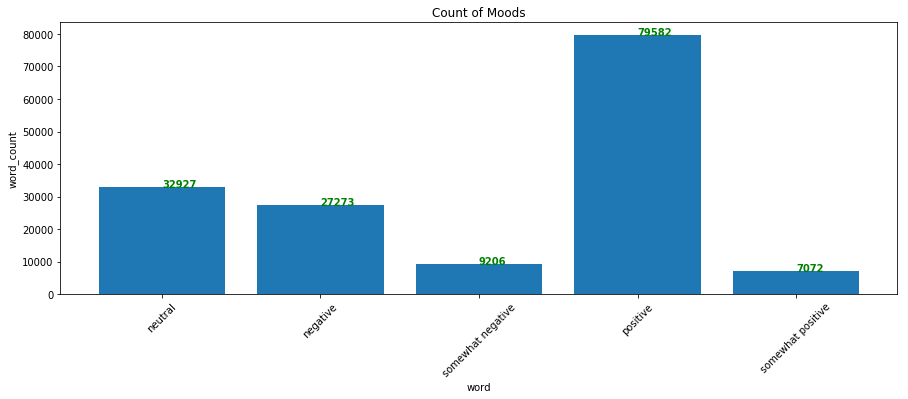

In [26]:
Index = [1,2,3,4,5]
plt.figure(figsize=(15,5))
plt.bar(Index,word_count,color = 'blue')
plt.xticks(Index,['neutral','negative','somewhat negative','positive','somewhat positive'],rotation=45)
plt.ylabel('word_count')
plt.xlabel('word')
plt.title('Count of Moods')
plt.bar(Index, word_count)
for a,b in zip(Index, word_count):
    plt.text(a, b, str(b) ,color='green', fontweight='bold')

In [1]:
#import matplotlib.pyplot as plt
#%matplotlib inline
#import seaborn as sns
#from wordcloud import WordCloud,STOPWORDS


In [44]:
positive=data[data['Sentiment_words']==('positive')]
words = ' '.join(positive['Phrase'])
split_word = " ".join([word for word in words.split()])

In [ ]:
#wordcloud = WordCloud(stopwords=STOPWORDS,
                      #background_color='black',
                      #width=3000,
                      #height=2500
                     #).generate(split_word)